In [1]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<Axes: >

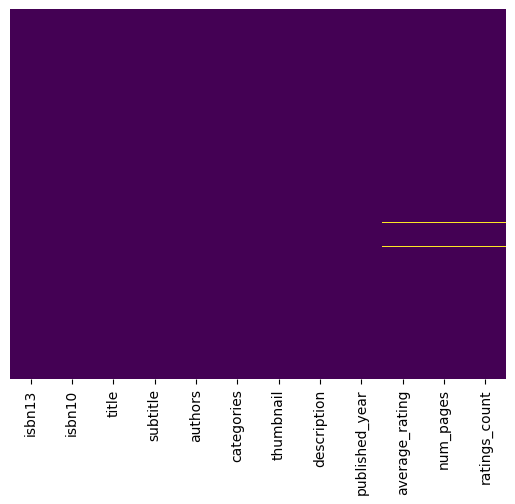

In [3]:
df = pd.read_json("books.json")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

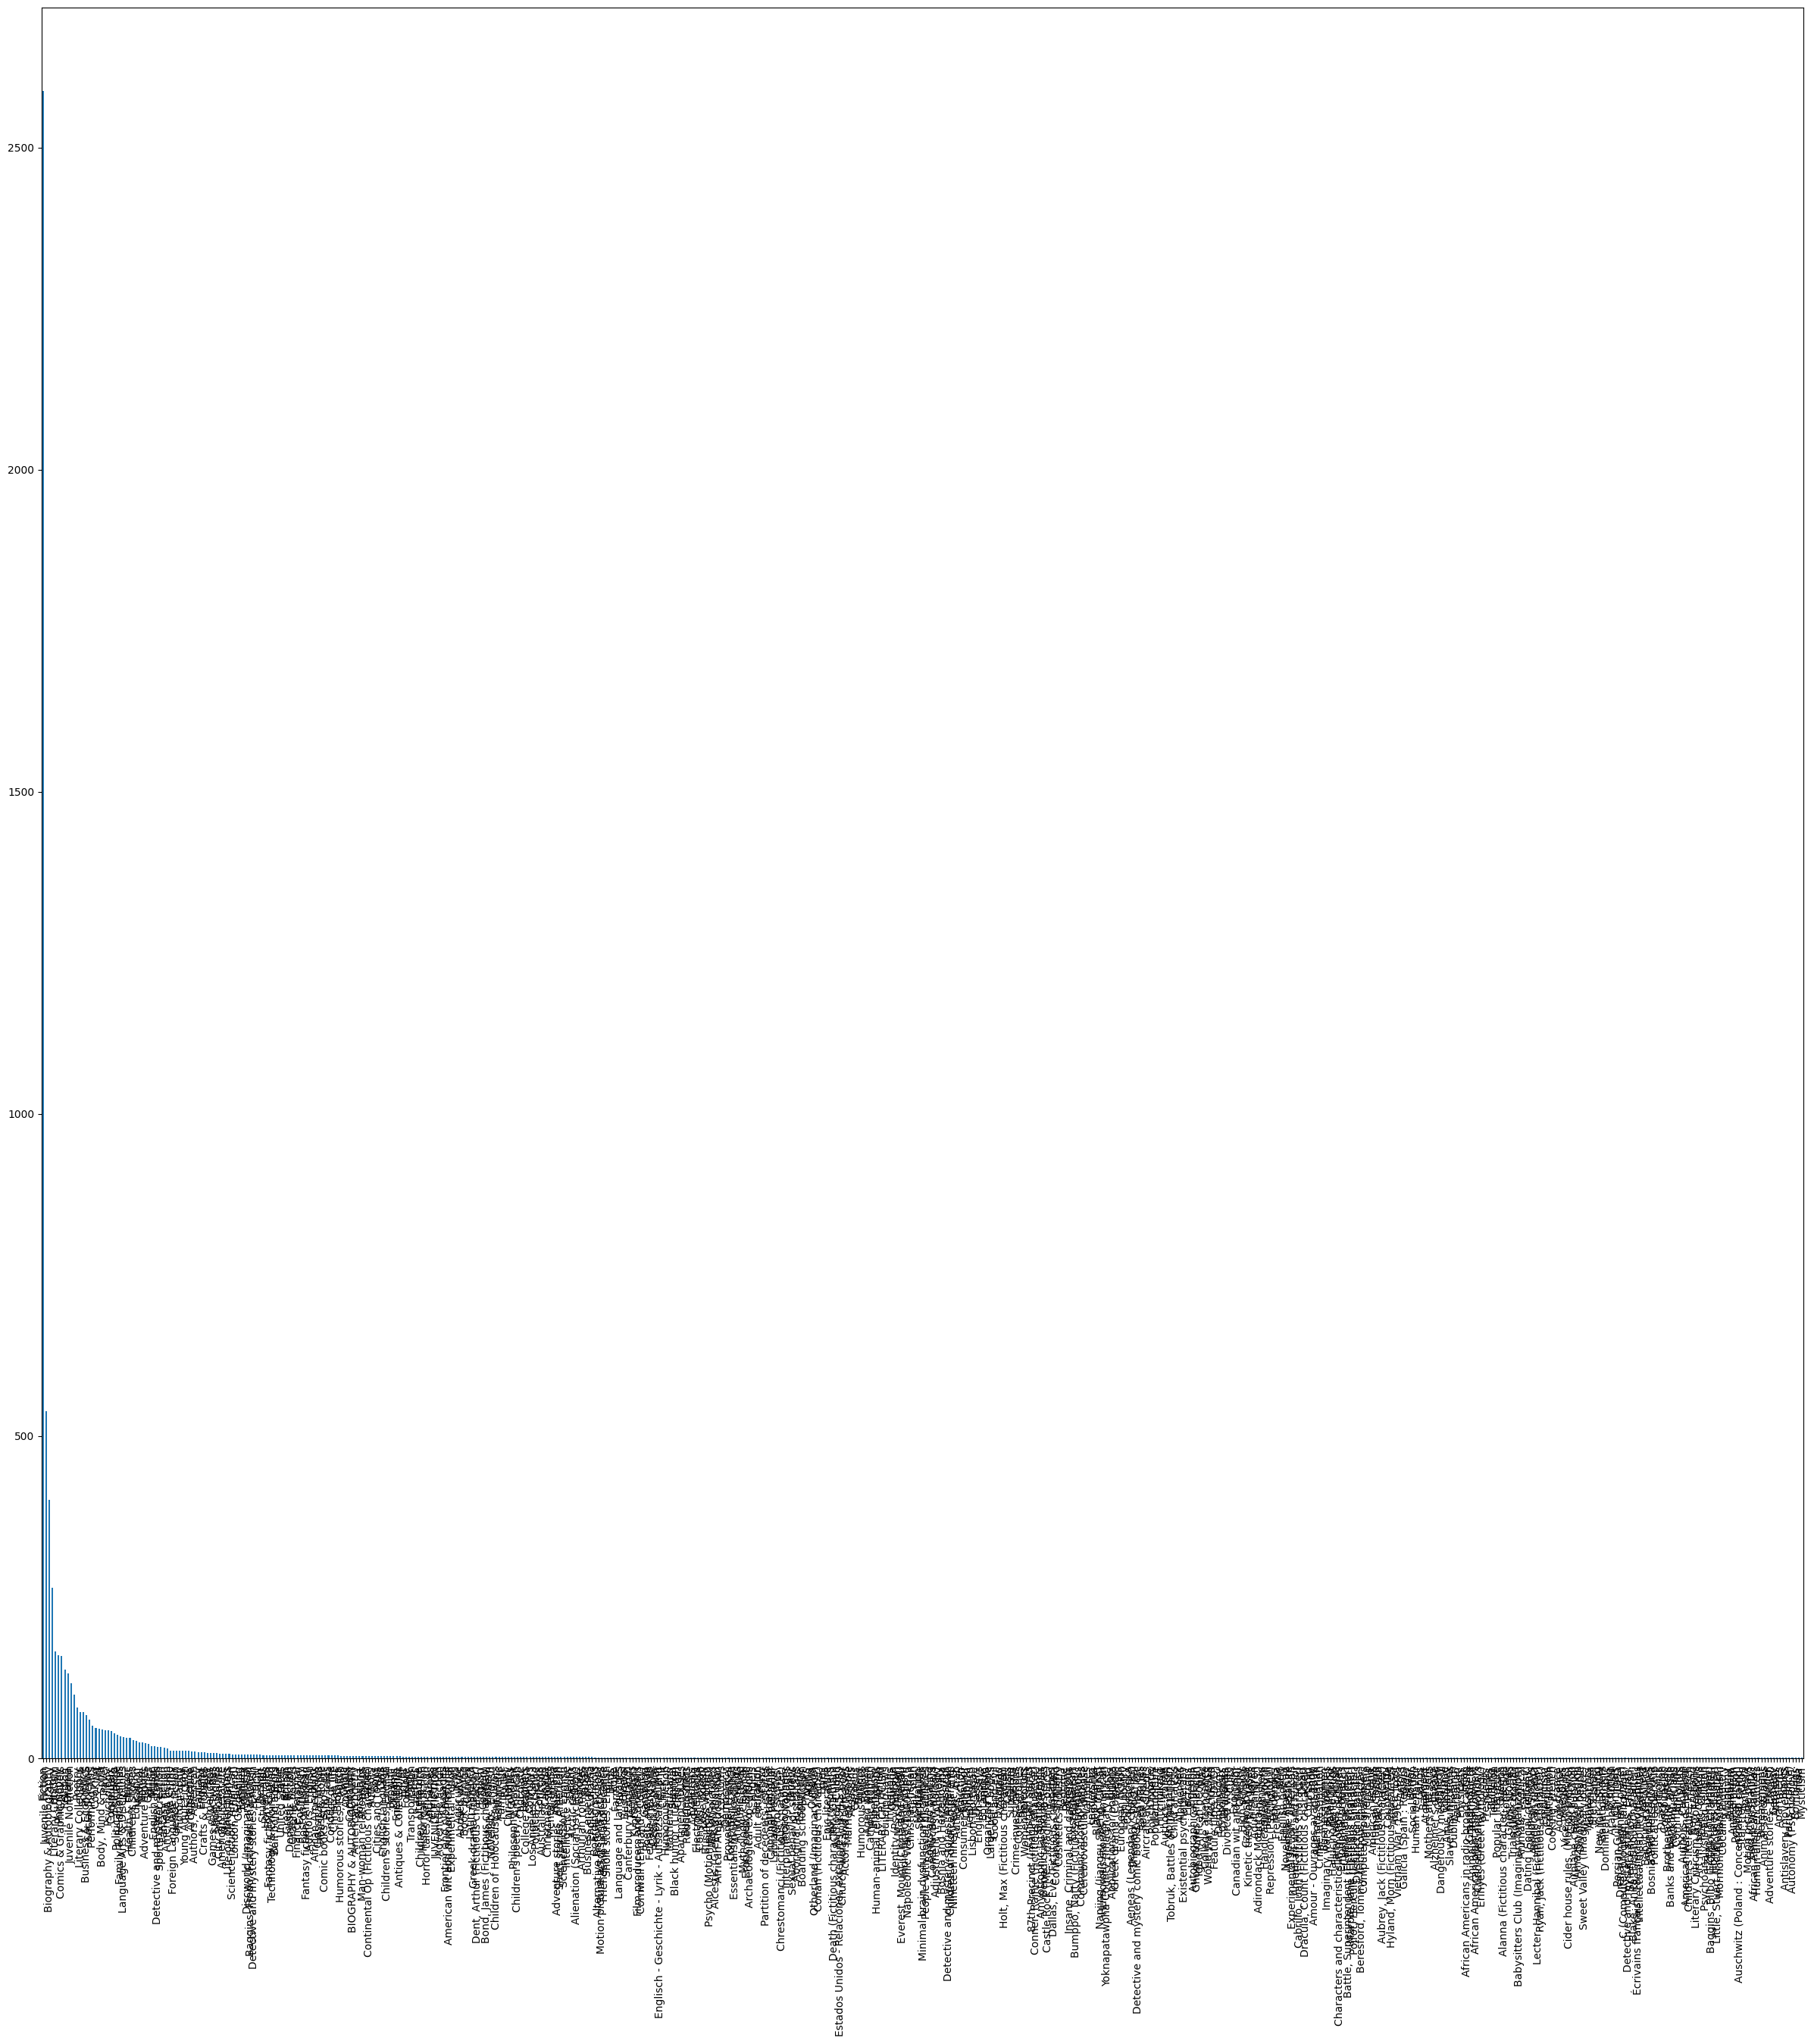

In [4]:
df['categories'].value_counts().plot( kind='bar', figsize=(30,30))

In [5]:
df['categories'].value_counts()

Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
                             ... 
Paris (France)                  1
Autonomy (Psychology).          1
Bombings                        1
India                           1
Mysticism                       1
Name: categories, Length: 568, dtype: int64

In [6]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [7]:
df.drop(df[(df['categories'] == 'Fiction')].index, inplace=True)
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
4,9780006280897,0006280897,The Four Loves,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,,Ray Bradbury,Book burning,,,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [8]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,4.222000e+03,4217.000000,4193.000000,4193.000000,4.193000e+03
mean,9.780726e+12,1998.483993,3.967524,323.294062,1.696126e+04
std,6.714573e+08,10.645388,0.351126,257.931151,1.487835e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.810000,176.000000,8.300000e+01
50%,9.780616e+12,2002.000000,4.000000,272.000000,4.790000e+02
75%,9.780826e+12,2005.000000,4.170000,399.000000,3.388000e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [9]:
df.isna().sum()

isbn13             0
isbn10             0
title              0
subtitle           0
authors            0
categories         0
thumbnail          0
description        0
published_year     5
average_rating    29
num_pages         29
ratings_count     29
dtype: int64

In [10]:
df.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0


In [11]:
df['categories'].unique()

array(['Detective and mystery stories', 'American fiction',
       'Christian life', 'Authors, English', 'Africa, East',
       'Hyland, Morn (Fictitious character)', 'Adventure stories',
       'Arthurian romances', 'Fantasy fiction', '', 'English drama',
       'Country life', 'English fiction', 'Clergy',
       'Aubrey, Jack (Fictitious character)',
       'Detective and mystery stories, English', 'Black Death',
       'Human cloning', 'Science fiction', 'Great Britain',
       'American essays', 'China', 'Capitalism', 'Ireland',
       'Juvenile Fiction', "Children's stories, English",
       'Male friendship', 'Literary Collections',
       'Beresford, Tommy (Fictitious character)',
       'Imaginary wars and battles', 'Dysfunctional families',
       'Poirot, Hercule (Fictitious character)', 'Christmas stories',
       'Marple, Jane (Fictitious character)', 'Belgians',
       'Battle, Superintendent (Fictitious character)',
       'Baggins, Frodo (Fictitious character)', 'Cambrid

In [12]:

stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say', 'book', 'novel']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0
df['text'] = df['title']  +  " " + df['description']

df['text'] = df['text'].swifter.apply(clean_txt)
df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))


Pandas Apply:   0%|          | 0/4222 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4222 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4222 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4222 [00:00<?, ?it/s]

In [13]:
X = df[['text', 'polarity', 'subjectivity','len']]
y =df['categories']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y)
v = dict(zip(list(y), df['categories'].to_list()))


In [14]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [15]:
text_clf.fit(x_train['text'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [16]:
import numpy as np
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)
predicted = text_clf.predict(X_TEST)
c = 0

for doc, category in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1 

-------------------------------------------------------
foundling present six short stories deal events precede birth taran key figure author five work kingdom prydain
Biography & Autobiography
-------------------------------------------------------
-------------------------------------------------------
players handbook well verse intricacies male psyche infamous hollywood madam offer test strategies hard wisdom survive love round come top
Biography & Autobiography
-------------------------------------------------------


In [17]:
np.mean(predicted == Y_TEST)

0.38825757575757575

In [18]:
docs_new = ['scary']
predicted = text_clf.predict(docs_new)
v[predicted[0]]

'Juvenile Fiction'

In [19]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(text_clf,f)

with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
docs_new = ["harry potter"]
predicted = clf2.predict(docs_new)
cat = v[predicted[0]]

In [20]:
cat

'Juvenile Fiction'

In [21]:
cat_books =  pd.read_csv('nlp.csv', index_col = "categories")
og_book = cat_books.loc[cat]
x = og_book['title']
y =  og_book['thumbnail']

x,y

(categories
 Juvenile Fiction                     Ocean Star Express
 Juvenile Fiction      The Princess of the Chalet School
 Juvenile Fiction         The voyage of the Dawn Treader
 Juvenile Fiction                     Rest, Rabbit, Rest
 Juvenile Fiction               Where the Red Fern Grows
                                    ...                 
 Juvenile Fiction                        The Drift House
 Juvenile Fiction                   Attack of the Jaguar
 Juvenile Fiction                 The Brothers Lionheart
 Juvenile Fiction    The Very Persistent Gappers of Frip
 Juvenile Fiction                             Good Fight
 Name: title, Length: 538, dtype: object,
 categories
 Juvenile Fiction    http://books.google.com/books/content?id=I2QZA...
 Juvenile Fiction    http://books.google.com/books/content?id=EJcQP...
 Juvenile Fiction    http://books.google.com/books/content?id=fDD3C...
 Juvenile Fiction    http://books.google.com/books/content?id=8-40_...
 Juvenile Fiction    ht

In [22]:
cat_books =  pd.read_csv('nlp.csv', index_col = "categories")
og_book = cat_books.loc['Juvenile Fiction']
tit = og_book["title"]
tit_books =  pd.read_csv('nlp.csv', index_col = "title")
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

for i in tit:
    if similar("Princess",i) >= 0.6:
        print(i)
        oeg_book = tit_books.loc[i]
        print(oeg_book['authors'])


Triss
Brian Jacques;David Elliot
A Little Princess
Frances Hodgson Burnett


In [23]:
type(og_book) 

pandas.core.frame.DataFrame

In [24]:
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,text,polarity,subjectivity,len
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,spiders web christie christmas full length ada...,0.071259,0.617007,748
2,9780006163831,0006163831,The One Tree,,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,one tree volume two stephen donaldsons acclaim...,0.000000,0.000000,103
4,9780006280897,0006280897,The Four Loves,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,four love lewis work nature love divide love f...,0.274242,0.563636,236
5,9780006280934,0006280935,The Problem of Pain,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,problem pain problem pain lewis one renowned c...,0.168750,0.431250,328
6,9780006353287,0006353282,An Autobiography,,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,autobiography donation,0.000000,0.000000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,collection timeless teach one greatest sag ind...,0.097917,0.546429,577
6806,9788185944609,8185944601,Secrets Of The Heart,,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,,1993.0,4.08,74.0,324.0,secrets heart,0.000000,0.000000,13
6807,9788445074879,8445074873,Fahrenheit 451,,Ray Bradbury,Book burning,,,2004.0,3.98,186.0,5733.0,fahrenheit,0.000000,0.000000,10
6808,9789027712059,9027712050,The Berlin Phenomenology,,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,berlin phenomenology since three volume editio...,0.226471,0.469608,1026


In [25]:
df.to_csv("nlp.csv", header=True, index = False)

In [26]:
df['authors'][1]

'Charles Osborne;Agatha Christie'

In [28]:
keys = []
values = []
dicts ={}
for i in tit:
        keys.append(i)
        values.append(similar('scary',i))

for i in range(len(keys)):
    dicts[keys[i]] = values[i]
        
z = max(dicts.values())

for i in tit:
       if similar('scary',i) == z:
              print(i) 
              org_book = tit_books.loc[i]
              x = org_book['authors']
              y = org_book['thumbnail']
              listt = [i,x,y]
listt

Castle Diary


['Castle Diary',
 'Richard Platt;Chris Riddell',
 'http://books.google.com/books/content?id=rFUBAAAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api']

In [29]:
auth = df['authors']
list = []
for i in auth:
    list.append(i)
list

['Charles Osborne;Agatha Christie',
 'Stephen R. Donaldson',
 'Clive Staples Lewis',
 'Clive Staples Lewis',
 'Agatha Christie',
 'Richard Hall',
 'Stephen R. Donaldson',
 'Sidney Sheldon',
 'Sidney Sheldon',
 'Robin Hobb',
 'Terence Hanbury White',
 'Raymond E. Feist;Joel Rosenberg',
 'Raymond E. Feist;S. M. Stirling',
 'Margaret Weis;Tracy Hickman',
 'Agatha Christie',
 'Philippa Gregory',
 'Susan Howatch',
 'Susan Howatch',
 'Susan Howatch',
 'Robin Hobb',
 "Patrick O'Brian",
 "Patrick O'Brian",
 'Agatha Christie',
 'Kim Stanley Robinson',
 'Michael Marshall Smith',
 'Tess Gerritsen',
 'Philippa Gregory',
 'Jessica Adams;Chris Manby;Fiona Walker',
 'Joan Didion',
 'Amy Tan',
 'Thomas L. Friedman',
 'Frank McCourt',
 'Mark Haddon;Peter Sutton',
 'Joan Aiken',
 'Elinor Mary Brent-Dyer',
 'Peter Straub',
 'John Ronald Reuel Tolkien',
 'Agatha Christie',
 'Agatha Christie',
 'Jude Fisher',
 'Douglas Coupland',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie

In [31]:
auth_data = []
auth_books =  pd.read_csv('nlp.csv', index_col = "authors")
for i in auth:
        if similar('Leil Lowndes',i) == z:
                authhh = i
                og_auth = auth_books.loc[i]
                a_tit = og_auth['title']
                a_thum =  og_auth['thumbnail']
                if type(a_tit) is str:
                    auth_data = [a_tit,authhh,a_thum]
                    print(auth_data)
                else:
                    for i in range(len(a_tit)):
                        auth_list = []
                        auth_list.append(a_tit[i])
                        auth_list.append(authhh)
                        auth_list.append(a_thum[i])
                        auth_data.append(auth_list)
                    print(auth_data)
                



In [32]:
auth_books =  pd.read_csv('nlp.csv', index_col = "authors")

    
auth = df['authors']
        
keys = []
values = []
dicts ={}
for i in auth:
            keys.append(i)
            values.append(similar('Willian Wordswith',i))
for i in range(len(keys)):
        dicts[keys[i]] = values[i]
            
z = max(dicts.values())
auth_data = []
for i in auth:
        if similar('Willian Wordswith',i) == z:
                authhh = i
                og_auth = auth_books.loc[i]
                a_tit = og_auth['title']
                a_thum =  og_auth['thumbnail']
                if type(a_tit) is str:
                    auth_data = [a_tit,authhh,a_thum]
                elif len(a_tit) == 1:
                    auth_data = [a_tit[0],authhh,a_thum[0]]       
                else:
                    for i in range(len(a_tit)):
                        auth_list = []
                        auth_list.append(a_tit[i])
                        auth_list.append(authhh)
                        auth_list.append(a_thum[i])
                        auth_data.append(auth_list)



                

In [33]:
auth_data

['Charles Dickens as a Legal Historian',
 'William Searle Holdsworth',
 'http://books.google.com/books/content?id=1_WdLFxkx6kC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api']